In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import scipy.stats as stats
import scipy.special as special
import powerlaw
import numpy as np

In [2]:
# Load the datasets from the assignment_1_data folder
path = "Assignment_02_data/"
files = [f for f in listdir(path) if isfile(join(path, f))]
gmls = [nx.read_gml(path + f) for f in files]

graphs = {k: v for k, v in zip(files, gmls)}

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities, label_propagation_communities

for G in graphs.values():

    # (a) Greedy Modularity Maximization
    greedy_communities = list(greedy_modularity_communities(G))

    # (b) Label Propagation Algorithm
    label_propagation_communities = list(label_propagation_communities(G))

    # Create a mapping of node to community for coloring
    node_community_mapping = {}

    # Assign colors to nodes based on the community they belong to
    for i, community in enumerate(greedy_communities):
        for node in community:
            node_community_mapping[node] = i

    # Draw the graph
    pos = nx.spring_layout(G)  # You can use different layout algorithms

    # Draw internal links in black and external links in light gray
    internal_edges = []
    external_edges = []
    for edge in G.edges():
        if node_community_mapping[edge[0]] == node_community_mapping[edge[1]]:
            internal_edges.append(edge)
        else:
            external_edges.append(edge)

    nx.draw_networkx_nodes(G, pos, node_color=[node_community_mapping[node] for node in G.nodes()], cmap=plt.cm.rainbow)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, edgelist=internal_edges, edge_color='black')
    nx.draw_networkx_edges(G, pos, edgelist=external_edges, edge_color='lightgray')

    # Show the plot
    plt.show()


KeyboardInterrupt: 

graph_Korea.gml


TypeError: draw_networkx_nodes() missing 1 required positional argument: 'pos'

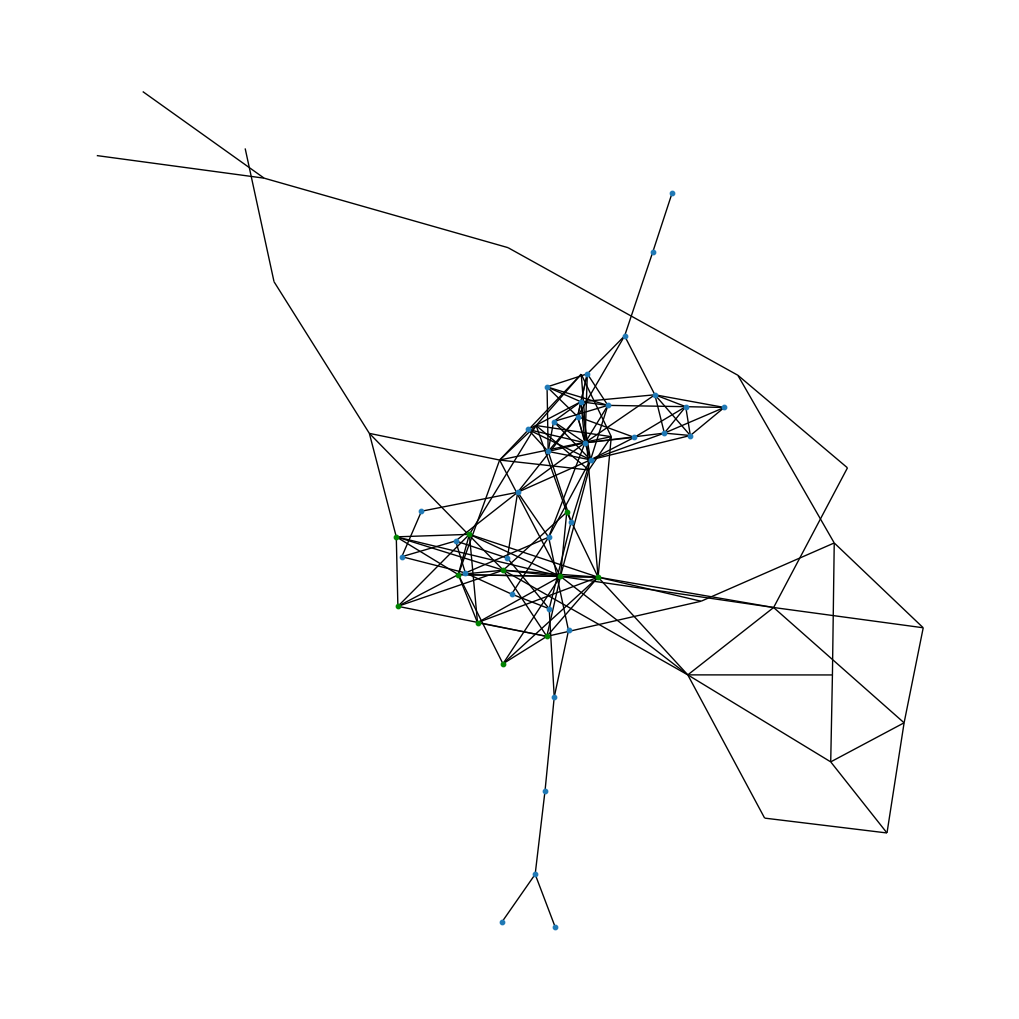

In [6]:
for k,v in graphs.items():
    print(k)
    community_greedy = nx.community.greedy_modularity_communities(v)
    community_label_propagation = nx.community.label_propagation_communities(v)
    plt.figure(figsize=(10,10))
    nx.draw(v, node_size=10)
    for i in community_greedy:
        nx.draw(v, node_size=10, node_color="green", nodelist=i)
        nx.draw_networkx_nodes(v, nodelist=i, node_color="green", node_size=10)
        nx.draw_networkx_edges(v, edgelist=nx.edges(v, i), edge_color="green")
    
    plt.show()





